#### Import modules

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden
from scipy.optimize import minimize_scalar

> ### 1.(a)

#### Define function

In [2]:
def f1(x):
    return x**2 + 2*x

#### Define the fibonacci search function

In [22]:
def fibonacci_search(f, a, b, n, ep = 0.01):
    # Initialization of lists
    la = []; lb = []; l = []; m = []; fl = []; fm = []
    
    s = (1-math.sqrt(5))/(1+math.sqrt(5))
    rho = 1/(golden*(1-s**(n+1))/(1-s**n))
    d = (rho*b) + ((1-rho)*a)
    yd = f(d)
    
    for i in range(n-1):
        if i == n-1:
            c = ep*a + (1-ep)*d
        else:
            c = rho*a + (1-rho)*b
        yc = f(c)
        # Append all informations
        la.append(a); lb.append(b); l.append(c); m.append(d)
        fl.append(yc); fm.append(yd)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
        rho = 1/(golden*(1-s**(n-i+1))/(1-s**(n-i)))
    # Dataframe
    tab = pd.DataFrame(list(zip(la, lb, l, m, fl, fm)), index = np.arange(1,n,1), columns = ['a_k', 'b_k', 'lambda', 'mu', 'f(lambda)', 'f(mu)'])
    # Returning left-right point and table
    if a < b:
        return (a, b, tab)
    else:
        return(b, a, tab)

In [23]:
left_fs, right_fs, tab = fibonacci_search(f = f1, a = -3, b = 5, n = 20)

#### Optima

In [24]:
(left_fs+right_fs)/2

-0.9998870723231915

In [25]:
tab[:9]

,a_k,b_k,lambda,mu,f(lambda),f(mu)
1,-3.000000,5.000000,0.055728,1.944272,0.114562,7.668737
2,-3.000000,1.944272,-1.111456,0.055728,-0.987578,0.114562
3,-3.000000,0.055728,-1.832816,-1.111456,-0.306418,-0.987578
4,0.055728,-1.832816,-0.665631,-1.111456,-0.888198,-0.987578
5,-1.832816,-0.665631,-1.386991,-1.111456,-0.850238,-0.987578
6,-0.665631,-1.386991,-0.941166,-1.111456,-0.996539,-0.987578
7,-0.665631,-1.111456,-0.835921,-0.941166,-0.973078,-0.996539
8,-1.111456,-0.835921,-1.006211,-0.941166,-0.999961,-0.996539
9,-1.111456,-0.941166,-1.046412,-1.006211,-0.997846,-0.999961


#### Interval lengths

In [7]:
len_fs = np.abs(tab.a - tab.b)
len_fs

1     8.000000
2     4.944272
3     3.055728
4     1.888544
5     1.167184
6     0.721360
7     0.445825
8     0.275535
9     0.170290
10    0.105245
11    0.065044
12    0.040201
13    0.024843
14    0.015358
15    0.009486
16    0.005872
17    0.003614
18    0.002258
19    0.001355
dtype: float64

#### Plot the interval lengths

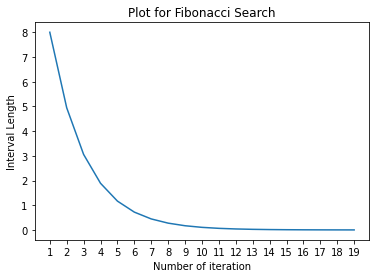

In [8]:
plt.plot([str(i) for i in range(1,20)], len_fs)
plt.xlabel("Number of iteration")
plt.ylabel("Interval Length")
plt.title("Plot for Fibonacci Search")
plt.show()

> ### 1.(b)

#### Golden Section Search

In [26]:
def golden_section_search(f, a, b, n):
    # Initialization of lists
    la = []; lb = []; l = []; m = []; fl = []; fm = []
    
    rho = golden-1
    d = (rho*b) + ((1-rho)*a)
    yd = f(d)
    
    for i in range(n-1):
        c = rho*a + (1-rho)*b
        yc = f(c)
        # Append all informations
        la.append(a); lb.append(b); l.append(c); m.append(d)
        fl.append(yc); fm.append(yd)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
    # Dataframe
    tab = pd.DataFrame(list(zip(la, lb, l, m, fl, fm)), index = np.arange(1,n,1), columns = ['a_k', 'b_k', 'lambda', 'mu', 'f(lambda)', 'f(mu)'])
    # Returning left-right point and table
    if a < b:
        return (a, b, tab)
    else:
        return(b, a, tab)

In [27]:
left_gs, right_gs, tab_gs = golden_section_search(f = f1, a = -3, b = 5, n = 20)

In [28]:
(left_gs+right_gs)/2

-0.9999182873019831

In [29]:
tab_gs[:9]

,a_k,b_k,lambda,mu,f(lambda),f(mu)
1,-3.000000,5.000000,0.055728,1.944272,0.114562,7.668737
2,-3.000000,1.944272,-1.111456,0.055728,-0.987578,0.114562
3,-3.000000,0.055728,-1.832816,-1.111456,-0.306418,-0.987578
4,0.055728,-1.832816,-0.665631,-1.111456,-0.888198,-0.987578
5,-1.832816,-0.665631,-1.386991,-1.111456,-0.850238,-0.987578
6,-0.665631,-1.386991,-0.941166,-1.111456,-0.996539,-0.987578
7,-0.665631,-1.111456,-0.835921,-0.941166,-0.973078,-0.996539
8,-1.111456,-0.835921,-1.006211,-0.941166,-0.999961,-0.996539
9,-1.111456,-0.941166,-1.046411,-1.006211,-0.997846,-0.999961


In [13]:
len_gs = np.abs(tab_gs.a - tab_gs.b)
len_gs

1     8.000000
2     4.944272
3     3.055728
4     1.888544
5     1.167184
6     0.721360
7     0.445825
8     0.275535
9     0.170290
10    0.105245
11    0.065045
12    0.040200
13    0.024845
14    0.015355
15    0.009490
16    0.005865
17    0.003625
18    0.002240
19    0.001385
dtype: float64

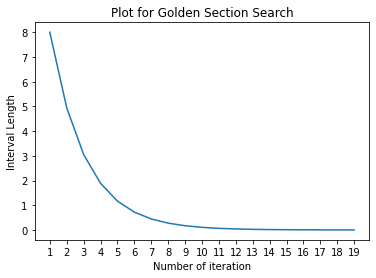

In [14]:
plt.plot([str(i) for i in range(1,20)], len_gs)
plt.xlabel("Number of iteration")
plt.ylabel("Interval Length")
plt.title("Plot for Golden Section Search")
plt.show()

> ### 1.(c)

In [15]:
gs_ms = minimize_scalar(fun = f1, bracket = (-3, 5), method = "golden")
gs_ms.x

-0.9999999987444217

> ### 2

In [16]:
from scipy.optimize import line_search

#### Define function and gradient

In [17]:
def f2(x):
    return x[0]**2 + x[0]*x[1] + x[1]**2
def grad_f2(x):
    a = 2*x[0] + x[1]
    b = 2*x[1] + x[0]
    return np.array([a,b])

In [18]:
x_init = np.array([1,2])
init_dir = np.array([-1,-1])
c1 = 0.0001; c2 = 0.9
max_step = 10; max_iter = 10
reduc_fact = 0.5
opt_ls = line_search(f = f2, myfprime = grad_f2, xk = x_init, pk = init_dir, c1 = c1, c2 = c2, amax = max_step,
                     maxiter = max_iter)

In [19]:
alpha = opt_ls[0]
opt = x_init + alpha*init_dir

In [20]:
opt_ls

(1.0, 2, 1, 1.0, 7.0, array([1., 2.]))

In [21]:
print(f"Co-ordinate of the optima is: ({opt[0]},{opt[1]})")

Co-ordinate of the optima is: (0.0,1.0)
